In [24]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,make_scorer,log_loss

In [2]:
pwd

'/Users/janmichaelaustria/Google Drive/Insight 2020/Sepsis Detection/Version3_Modeling_XGb'

In [3]:
sepsis = pd.read_csv('/Users/janmichaelaustria/Google Drive/Insight 2020/Sepsis Detection/Sepsis_Compiled_Interpolated.csv',index_col=0)

/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
sepsis['SepsisLabel'].value_counts()

0    1524294
1      27916
Name: SepsisLabel, dtype: int64

In [5]:
sepsis.iloc[:,1:-6].head()

,Delta_t_hours,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender
0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83,0
1,1,97.0,95.0,0.0,98.0,75.330,0.0,19.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83,0
2,2,89.0,99.0,0.0,122.0,86.000,0.0,22.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83,0
3,3,90.0,95.0,0.0,122.0,88.665,0.0,30.0,0.0,24.000000,0.0,0.00,7.360000,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83,0
4,4,103.0,88.5,0.0,122.0,91.330,0.0,24.5,0.0,23.857143,0.0,0.28,7.365714,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83,0


In [6]:
X = sepsis.iloc[:,1:-6]
y = sepsis['SepsisLabel']

In [7]:
X.shape,y.shape

((1552210, 37), (1552210,))

In [8]:
features = list(X.columns)
features

['Delta_t_hours',
 'HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'EtCO2',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Chloride',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'Hct',
 'Hgb',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'Age',
 'Gender']

In [9]:
xgb_model = xgb.XGBClassifier()

In [10]:
parameters = {'objective':['binary:logistic'],
              'max_depth': [9],
              'n_estimators': [300]}
scoring = {'f1': make_scorer(f1_score), 
           'Accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall':make_scorer(recall_score),
          'auc':make_scorer(roc_auc_score)}

kfold = StratifiedKFold(n_splits=3, shuffle=True)

In [11]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, 
                   cv=kfold, 
                   scoring=scoring,
                   verbose=3, refit='auc')
clf.fit(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 46.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:l...
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [9], 'n_estimators': [300],
                         'objective': ['binary:logistic']},
             pre_dispatch='2*n_jobs', refit='auc', return_train_score=False,
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'auc': make_scorer(roc_auc_score),
               

https://www.kaggle.com/phunter/xgboost-with-gridsearchcv
https://stackoverflow.com/questions/50537651/multiple-scoring-metrics-with-sklearn-xgboost-gridsearchcv
https://stackoverflow.com/questions/50824326/xgboost-with-gridsearchcv-scaling-pca-and-early-stopping-in-sklearn-pipeline


In [12]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_objective,params,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_auc,split1_test_auc,split2_test_auc,mean_test_auc,std_test_auc,rank_test_auc
0,2732.099049,6.438893,25.215882,0.307547,9,300,binary:logistic,"{'max_depth': 9, 'n_estimators': 300, 'objecti...",0.684998,0.665356,0.670922,0.673759,0.008266,1,0.99121,0.990787,0.990932,0.990976,0.000176,1,0.963562,0.959312,0.965677,0.96285,0.002647,1,0.531378,0.509296,0.514025,0.518233,0.009493,1,0.765505,0.75445,0.756845,0.758933,0.004748,1


In [14]:
pd.DataFrame(clf.cv_results_).to_csv('xg_boost_v4_GOOD_metrics.csv')

In [13]:
#save model
import pickle
pickle.dump(clf.best_estimator_, open('xg_boost_v4_GOOD.sav', 'wb'))

In [45]:
loaded_model = pickle.load(open('xg_boost_v4_GOOD.sav', 'rb'))

In [29]:
#generate items for metrics
samples = np.random.choice(a=X.shape[0],size=10000,replace=False)
predictions = clf.predict(X.iloc[samples,:])
probas = clf.predict_proba(X.iloc[samples,:])[:,0]
len(predictions),len(probas)

(10000, 10000)

In [30]:
confusion_matrix(y.iloc[samples],predictions)

array([[9803,    1],
       [  60,  136]])

In [32]:
print(classification_report(y.iloc[samples],predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9804
           1       0.99      0.69      0.82       196

    accuracy                           0.99     10000
   macro avg       0.99      0.85      0.91     10000
weighted avg       0.99      0.99      0.99     10000



Text(0, 0.5, 'TPR')

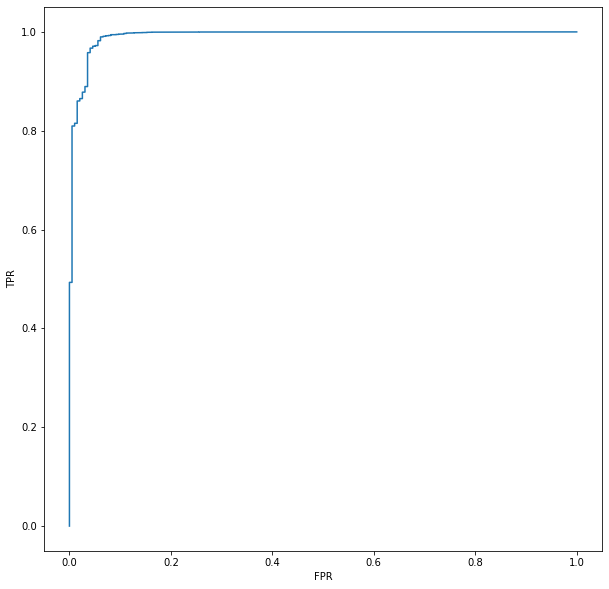

In [33]:
fpr, tpr, thresholds = roc_curve(y.iloc[samples], probas)
plt.figure(figsize=(10,10))
plt.plot(tpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [39]:
features

['Delta_t_hours',
 'HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'EtCO2',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Chloride',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'Hct',
 'Hgb',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'Age',
 'Gender']

In [42]:
featur_importances = pd.DataFrame()
featur_importances['Features'] = features
featur_importances['Importance'] = clf.best_estimator_.feature_importances_

In [44]:
featur_importances.sort_values('Importance',ascending=False)

,Features,Importance
0,Delta_t_hours,0.057623
11,FiO2,0.036894
18,Calcium,0.033866
24,Magnesium,0.033842
3,Temp,0.033279
10,HCO3,0.031915
17,Alkalinephos,0.031392
32,WBC,0.029822
23,Lactate,0.029675
16,BUN,0.029209


In [ ]:
# save model to file
pickle.dump(model, open("pima.pickle.dat", "wb"))
2
# load model from file
loaded_model = pickle.load(open("pima.pickle.dat", "rb"))

In [56]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
pickle.dump(clf.best_estimator_, open("xgboost_v1.pima.pickle.dat","wb"))

<Figure size 864x864 with 0 Axes>

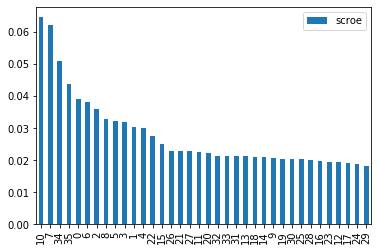

In [62]:
plt.figure(figsize=(12,12))
featur_importances.sort_values('scroe',ascending=False).plot.bar()
plt.show()

In [38]:
(.85 + .50)**-1

0.7407407407407407